## Linear Regression

* Creating machine learning models for linear regression problems

### Project: Boston Housing Prices Prediction

In [2]:
#Import basic libraries
import matplotlib.pyplot as plt

#Load data set from sklearn
from sklearn import datasets
boston = datasets.load_boston()

#Analyse data set
print(boston.feature_names)

#details about the dataset present here
# https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

#Assign the output variable 
y = boston.target

#Initialize the model to empty variable
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#Fit the model: cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation.
predicted = cross_val_predict(lr, boston.data, y, cv=10)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


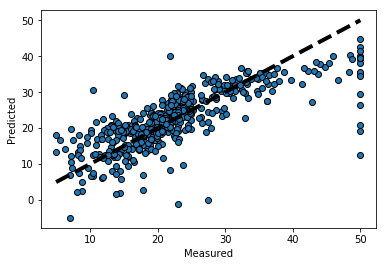

In [3]:
#Plot the output
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Project: E-commerce Customer Data

### Data Description

*  It has 4 input features (Avg. Session Length, Time on App, Time on Website & Length of Membership) and the output to be predicted is ‘Yearly Amount Spent’.

### Project Goal

> **Predict the yearly amount spent by each customer based on their browsing behavior (Avg. Session Length, Time on App, Time on Website & Length of Membership).**

### Loading libraries and data set

In [5]:
# Import external packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data set from csv file
customers = pd.read_csv('data/Ecommerce Customers')
customers.head()
# Preliminary analysis of data set (Check column names and total records)
print(customers.count())

Email                   500
Address                 500
Avatar                  500
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64


### Preparation for Modeling
* Select your input features based on your project goal. The dataset consists of many data points or features but you have to select the features which are strongly correlated with the output value. It is called Feature Engineering.  

In [6]:
# Select your input features & output variable
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]

y = customers['Yearly Amount Spent']

### Split Data into Training and Test Set

Divide the samples of output Y and features X into two sets 1-Training set & 2-Testing set. Training set will be used to train your model while Test set will be used to evaluate the model accuracy. Earlier we used a general rule for the ratio of training/test sets as 70/30 or 60/40 but with time it is proved that this ratio is empirical and completely depends on the total size of your data set. If the number of samples is very large (say more than 1 Million) then only 1% of samples are enough to check the accuracy of the model. In our practice example, we will use the 70/30 ratio.

Sklearn provides a built-in function ‘train_test_split’ to randomly divide the data set into train-test sets.

In [7]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# Assign the output to four variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Check the results
print(X_train.count())
print(X_test.count())

Avg. Session Length     350
Time on App             350
Time on Website         350
Length of Membership    350
dtype: int64
Avg. Session Length     150
Time on App             150
Time on Website         150
Length of Membership    150
dtype: int64


### Train a Model

In [9]:
#Import LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Initialize the model to empty variable
lm = LinearRegression()

"""
Use 'fit' method to train the model
model.fit(X, y, sample_weight=None)
where X is NumPy array of input features
y is NumPy array of output variable
sample_weight is NumPy array of individual weights for each sample
"""
lm.fit(X_train, y_train)

#Now check the coeeficients. It will return coefficient of individual input feature.
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


### Test the Model


MSE:  79.81305165097481


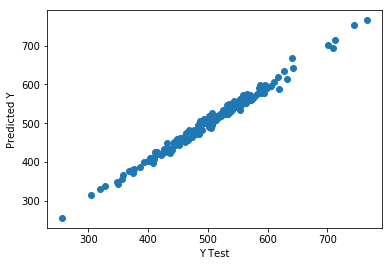

In [10]:
# Use 'predict' method to test the model 'lm'
predictions = lm.predict(X_test)

#Now Check the mean squared error
from sklearn import metrics
print('MSE: ', metrics.mean_squared_error(y_test, predictions))

#Compare the predicted output and actual output using scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

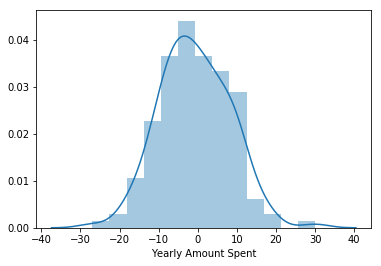

In [11]:
#Check distribution plot
sns.distplot((y_test-predictions))
plt.show()

### Prediction for a new Cusotmer
* If we want to predict the yearly amount of spending for a new customer, we will use the predict method.

In [13]:
#Create a 2D numpy array of input features
ind_cus = np.array([[32.187812, 14.715388, 38.244115, 1.516576]])

#Use predict method
print('Yearly amount spent = ', lm.predict(ind_cus))

Yearly amount spent =  [456.4419032]


<span style="color:red; font-family:Comic Sans MS">**Sources & References from:** </span>     
<a href="https://engmrk.com/module-11-linear-regression-2/" target="_blank">https://engmrk.com/module-11-linear-regression-2/</a>  


<span style="color:red; font-family:Comic Sans MS">Further Resources: </span>     
<a href="http://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt" target="_blank">http://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt</a>  
<a href="http://stackabuse.com/linear-regression-in-python-with-scikit-learn/" target="_blank">http://stackabuse.com/linear-regression-in-python-with-scikit-learn/</a>  